<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [4]:
from optimize_with_Gurobi import *

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
km = pd.DataFrame.from_dict(trip_refuel_km, orient='index')
trip_id = km.index.map(lambda x: int(x[0]))
refuel_at = km.index.map(lambda x: int(x[1]))
trip_refuel = pd.DataFrame({
    'trip_id': trip_id,
    'refuel_at': refuel_at,
    'fuel_km': km.loc[:,0]
})[['trip_id', 'refuel_at', 'fuel_km']]
trip_refuel.head()

,trip_id,refuel_at,fuel_km
"(1, 72)",1,72,216.0
"(1, 11)",1,11,162.0
"(2, 72)",2,72,216.0
"(2, 11)",2,11,162.0
"(2, 13)",2,13,82.0


In [53]:
trips_info = pd.read_csv('Trips_info.csv', usecols=['trip_id', 'ktons'])
trips_info.head()

,trip_id,ktons
0,1,20742.531399
1,2,575.593567
2,3,575.593567
3,4,575.593567
4,5,575.593567


In [55]:
trip_refuel_km_kton = trip_refuel.merge(trips_info, left_on='trip_id', right_on='trip_id', how='left')
trip_refuel_km_kton.head()

,trip_id,refuel_at,fuel_km,ktons
0,1,72,216.0,20742.531399
1,1,11,162.0,20742.531399
2,2,72,216.0,575.593567
3,2,11,162.0,575.593567
4,2,13,82.0,575.593567


In [65]:
trip_refuel_km_kton_kgH2 = trip_refuel_km_kton.assign(kgH2 = lambda r: r.fuel_km*0.621371*r.ktons*1000/150*135.8/120/365)
# 0.621...: km -> miles
# 1000: ktons -> tons
# 150: truck fuel efficiency 150 ton-miles/gallon diesel
# 135.8: diesel LHV 135.8 MJ/gallon 
# 120: hydrogen 120 MJ/kg
# 365: year -> day
trip_refuel_km_kton_kgH2.head()

,trip_id,refuel_at,fuel_km,ktons,kgH2
0,1,72,216.0,20742.531399,57544.111414
1,1,11,162.0,20742.531399,43158.083560
2,2,72,216.0,575.593567,1596.816691
3,2,11,162.0,575.593567,1197.612518
4,2,13,82.0,575.593567,606.198929


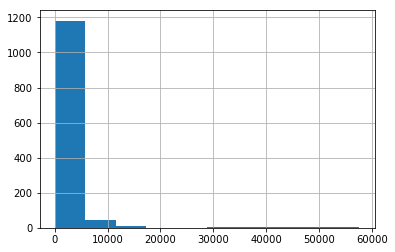

In [66]:
trip_refuel_km_kton_kgH2.kgH2.hist()

In [72]:
hrs_kgH2 = trip_refuel_km_kton_kgH2[['refuel_at', 'kgH2']].groupby('refuel_at', as_index=False).sum()
hrs_kgH2.rename(columns={'refuel_at': 'hrs_node_id'}, inplace=True)
# hrs_kgH2.to_csv()
hrs_kgH2

,hrs_node_id,kgH2
0,4,69764.483129
1,6,160451.785543
2,11,232165.373719
3,13,226079.687167
4,17,156856.741743
5,20,170778.891777
6,33,310999.022040
7,34,523646.867043
8,44,171846.969317
9,51,83097.300549
